In [1]:
import numpy as np
from matplotlib import pyplot as plt

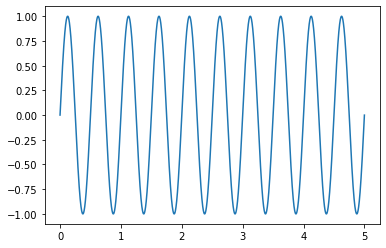

In [2]:
SAMPLE_RATE = 44100  # Hertz
DURATION = 5  # Seconds

def generate_sine_wave(freq, sample_rate, duration):
    x = np.linspace(0, duration, sample_rate * duration, endpoint=False)
    frequencies = x * freq
    # 2pi because np.sin takes radians
    y = np.sin((2 * np.pi) * frequencies)
    return x, y

# Generate a 2 hertz sine wave that lasts for 5 seconds
x, y = generate_sine_wave(2, SAMPLE_RATE, DURATION)
plt.plot(x, y)
plt.show()
plt.clf()
plt.cla()
plt.close()


In [3]:
_, nice_tone = generate_sine_wave(400, SAMPLE_RATE, DURATION)
_, noise_tone = generate_sine_wave(4000, SAMPLE_RATE, DURATION)
noise_tone = noise_tone * 0.3

mixed_tone = nice_tone + noise_tone


In [4]:
plt.plot(mixed_tone[:1000] / (mixed_tone[:1000]).max())
plt.clf()
plt.cla()
plt.close()

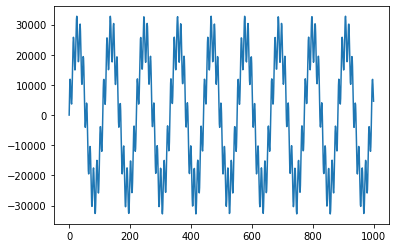

In [5]:
normalized_tone = np.int16((mixed_tone / mixed_tone.max()) * 32767)

plt.plot(normalized_tone[:1000])
plt.show()

plt.clf()
plt.cla()
plt.close()

In [6]:
from IPython.display import Audio

In [7]:
Audio(data=normalized_tone, rate=SAMPLE_RATE)

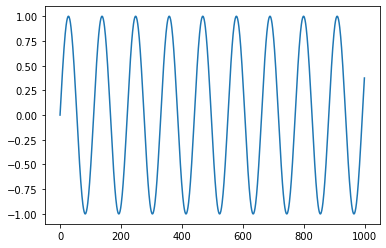

In [8]:
plt.plot(nice_tone[:1000])
plt.show()
plt.clf()
plt.cla()
plt.close()

In [9]:
Audio(data=(np.int16(nice_tone / nice_tone.max() * 32767)), rate=SAMPLE_RATE)

In [10]:
Audio(data=(np.int16(noise_tone / noise_tone.max() * 32767)), rate=SAMPLE_RATE)

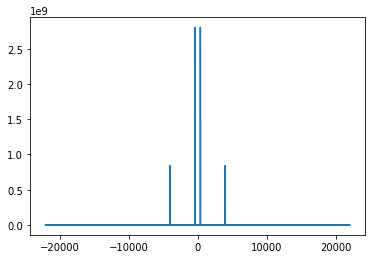

In [11]:
# SCIPY FFT
from scipy.fft import fft, fftfreq

# Number of samples in normalized_tone
N = SAMPLE_RATE * DURATION

yf = fft(normalized_tone)
xf = fftfreq(N, 1 / SAMPLE_RATE)

plt.plot(xf, np.abs(yf))
plt.show()
plt.clf()
plt.cla()
plt.close()

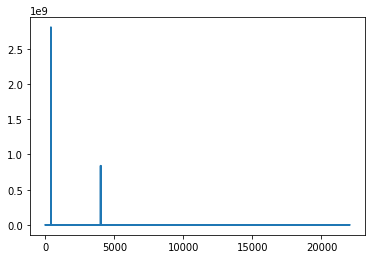

In [12]:
plt.plot(np.abs(xf), np.abs(yf))
plt.show()
plt.clf()
plt.cla()
plt.close()

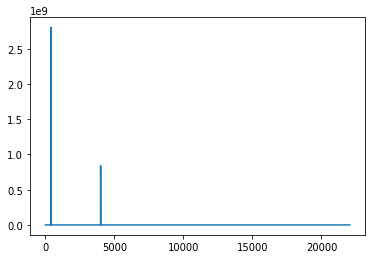

In [13]:
# NUMPY
from scipy.fft import rfftfreq

yf_np = np.fft.rfft(normalized_tone)
xf_sc = rfftfreq(N, 1/SAMPLE_RATE)
#xf_np = np.arange(0, N, 1/SAMPLE_RATE)

plt.plot(np.abs(xf_sc), np.abs(yf_np))
plt.show()
plt.clf()
plt.cla()
plt.close()

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:12: RuntimeWarning: divide by zero encountered in log
  if sys.path[0] == '':


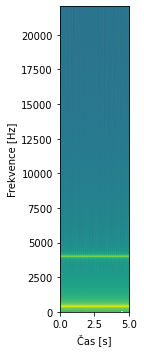

3861


In [14]:
from scipy.signal import spectrogram


columns = normalized_tone.size // 512

frames = list()
for i in range(0, columns - 1):
        frames.append(normalized_tone[i * 512: (i * 512) + 1024])

filtered_X = np.array([np.abs(np.fft.fft(x)) for x in frames])
plt.figure(figsize=(5, 5))
x = (10 * np.log(np.abs(filtered_X.T[:512] ** 2)))
#x[38] = 200


plt.imshow(x, extent=(0, DURATION, SAMPLE_RATE // 2, 0))


plt.gca().set_xlabel('Čas [s]')
plt.gca().set_ylabel('Frekvence [Hz]')
plt.gca().invert_yaxis()
plt.gca().set_aspect(0.001)
plt.tight_layout()
plt.show()

print(len(frames) * 9)

In [15]:
print(t)  # TODO: detegovat vysoku amplitudu by bolo fajn, aby sa to nemuselo rucne odcitat  grafu 

NameError: name 't' is not defined

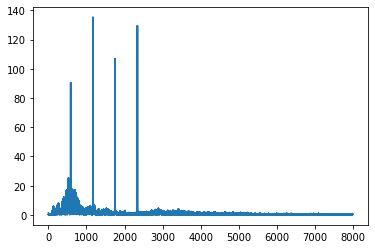

In [18]:
# SCIPY FFT
import librosa
SAMPLE_RATE = 16000
DURATION = 4.16

my, Fs = librosa.load("audio/xdobro23.wav", sr=16000)

# Number of samples in normalized_tone
N = SAMPLE_RATE * DURATION

yf = fft(my)
xf = fftfreq(int(N), 1 / SAMPLE_RATE)

plt.plot(np.abs(xf), np.abs(yf))
plt.show()
plt.clf()
plt.cla()
plt.close()